### Exercise 1
The radioisotope thallium $208$ decays to lead $208$, with a half-life of $\tau = 3.053$ minutes. Assume we start with $N = 1000$ thallium $208$ isotopes. The goal of the exercise is to produce a plot that shows how many thallium isotopes remain in the sample as a function of time, considering the interval between $t=0$ and $t=3000$ sec and splitting it into $\Delta t = 1$ sec time-step. Do this by simulating the decay in the following two ways:

1. The probability that a single atom decays in a time interval $\Delta t$ = 1 sec is $p = 1 - 2^{-t/\tau}$. At each time step, loop through all the thallium isotopes that are still in the sample and use a uniform random number generator to establish whether the decay takes place. Keep track of the remaining thallium isotopes at each step in the sample and plot this quantity at the end.   

2. The probability that a given isotope decays between some time $t$ and $t + dt$ is given by:
$P(t) dt = \frac{log(2)}{\tau} e^{-t (log2/\tau)} dt$.

a) Find a suitable transformation of a uniform probability distribution that generates random variables distributed according to $P(t)$ above (i.e. distributed according to an exponential distribution $p(t) = \mu e^{-\mu t}$, where in our case $\mu = log(2)/\tau$).

b) USing this transformation, write a function to sample a vector of $1000$ random variables distributed as $P(t)$

c) The random variables above represent the times at which each of the isotope decays. Use np.sort to rearrange these times in increasing order and use the final vector to calculate how many thallium isotopes remain at each $\Delta t$, time-step, in the interval $0 < t < 3000$ sec. Plot this quantity as a function of time   

In [1]:
import numpy as np
import matplotlib.pyplot as plt

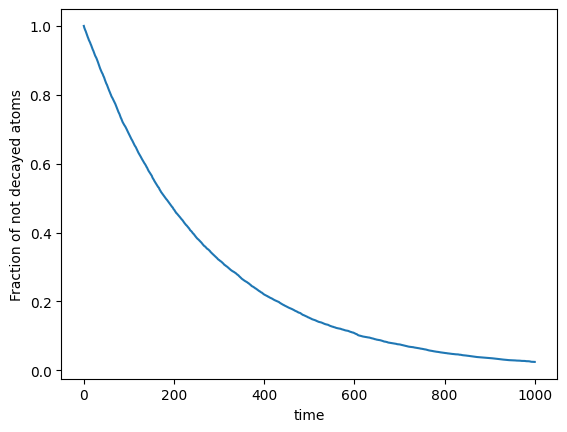

In [26]:
# Solution 1.2

seed = 4349876
N = 10000
T = 1000

def decaying_times(N):
    half_life = 3.053  # min
    min2sec = 60
    tau = half_life*min2sec 
    rng = np.random.default_rng(seed)
    rvs = rng.random(N)
    mu = np.log(2)/tau
    times = (-1./mu)*np.log(1-rvs)
    return times 

times = decaying_times(N)

times = np.sort(times)

not_decayed = [ ]
for t in range(T+1):
    nd = len(times[times>t])
    not_decayed.append(float(nd)/float(N))

plt.plot(range(T+1),not_decayed)
plt.xlabel('time')
plt.ylabel('Fraction of not decayed atoms')
plt.show()

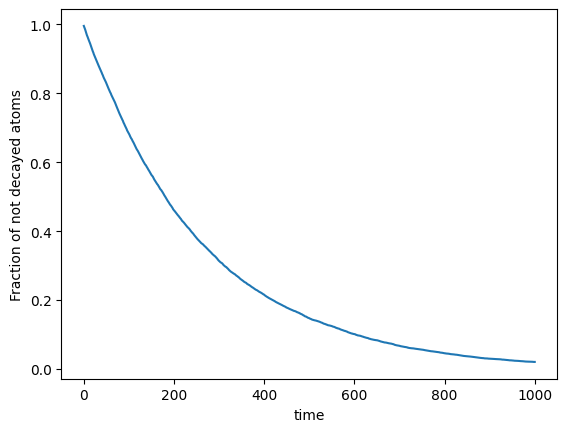

In [25]:
# Solution 1.1

seed = 4349876
N = 10000
T = 1000

half_life = 3.053  # min
min2sec = 60
tau = half_life*min2sec

prob_1sec = 1. - 2.**(-1./tau)
rng = np.random.default_rng(seed)

remaining = N

not_decayed = []
for t in range(T+1):
    count = 0
    for atom in range(remaining + 1):
        rv = rng.random()
        if rv < prob_1sec:
            count += 1
            
    remaining = remaining - count
    
    not_decayed.append(float(remaining)/N)
    

plt.plot(range(T+1),not_decayed)
plt.xlabel('time')
plt.ylabel('Fraction of not decayed atoms')
plt.show()

### Exercise 2

The following system of ODEs describes a set of coipled magnetic rotors with velocity dependent damping:

$\ddot{\Theta}_1 = \beta \sin(\Theta_2 - \Theta_1) - b \dot{\Theta}_1$

$\ddot{\Theta}_2 = \beta \sin(\Theta_1 - \Theta_2) - b \dot{\Theta}_2$

1. Take $b = 0.1$, $\beta = 5$ and solve numerically the system in the time interval $0 < t < 40$ for the following two sets of initial conditions:

a) $\Theta_1 = \Theta_2 = 0$, $\dot{\Theta}_1 = 1$, $\dot{\Theta_2} = -1$

b) $\Theta_1 = \Theta_2 = 0$, $\dot{\Theta}_1 = 7$, $\dot{\Theta_2} = -3$

2. For each solution at point 1., plot:

a) $\Theta_1$ and $\Theta_2$ as functions of time

b) $\dot{\Theta}_1$ and $\dot{\Theta}_2$ as functions of time

c) $\dot{\Theta_1}$ against $\Theta_1$ (phase space plot)

In [71]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Turning 2nd order equation into system of 2 first order ODES
# Function computing the vector of derivatives: the list "params" contains the values of b and beta.
def g(x,t,params):
    
    # x = [theta1, ph1, theta2, phi2]
    
    theta1 = x[0]  # theta1
    phi1 = x[1]    # dtheta1/dt
    theta2 = x[2]  # theta2 
    phi2 = x[3]    # dtheta2/dt
    
    b = params[0]
    beta = params[1]
    
    theta1dot = phi1
    phi1dot = beta*(np.sin(theta2 - theta1)) - b*phi1
    theta2dot = phi2
    phi2dot = beta*np.sin(theta1 - theta2) - b*phi2
    
    return np.array([theta1dot,phi1dot,theta2dot,phi2dot])


# Writing the function in a form which can be passed to scipy odeint
b = 0.1
beta = 5.0

def f(x,t): return g(x,t,params=[b,beta])

# Times at which I evaluate the solution
tmin = 0.
tmax = 40.
h = 0.01
t = np.arange(tmin, tmax, h)

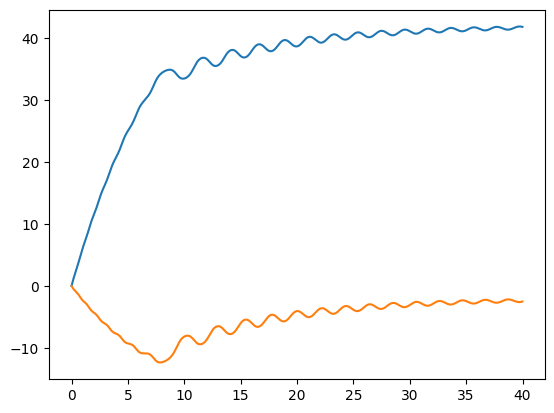

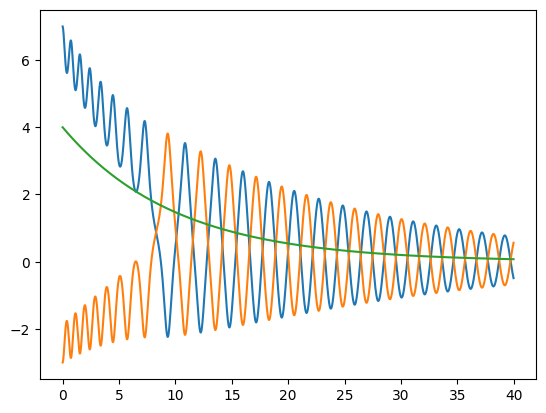

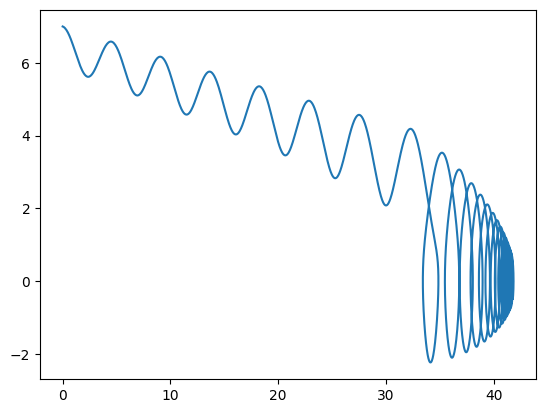

In [77]:
# Initial conditions
y0 = [0.,+7.,0.,-3.]
              
y = sp.integrate.odeint(f,y0,t) 

plt.plot(t,y[:,0])
plt.plot(t,y[:,2])
plt.show()

plt.plot(t,y[:,1])
plt.plot(t,y[:,3])
plt.plot(t,y[:,1]+y[:,3])
plt.show()

plt.plot(y[:,0],y[:,1])
plt.show()

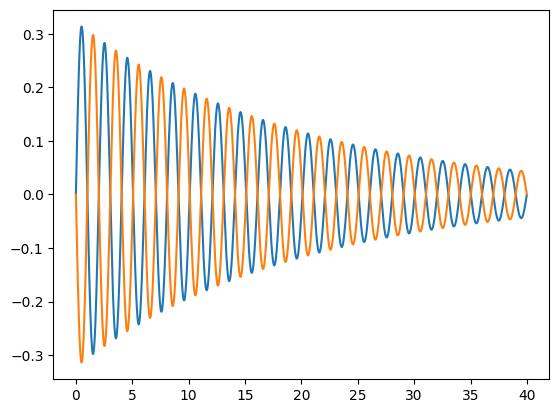

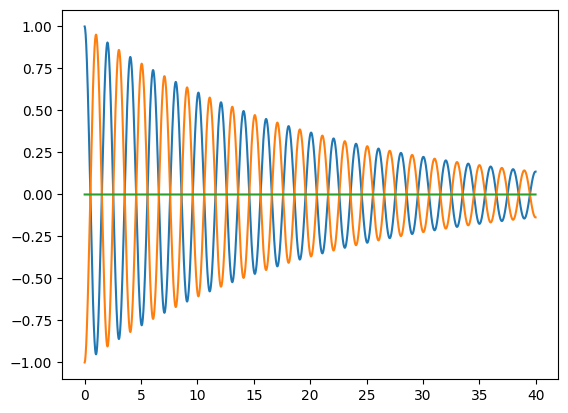

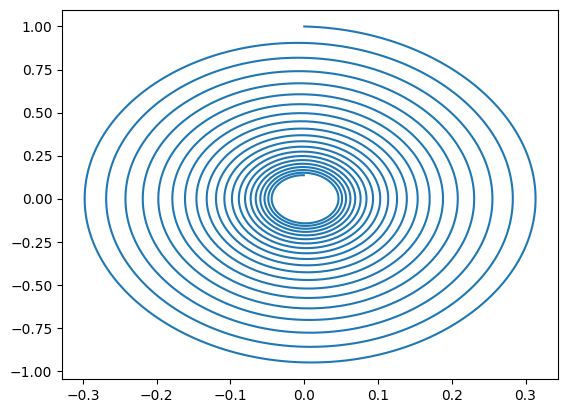

In [79]:
# Initial conditions
y0 = [0.,1.,0.,-1.]
              
y = sp.integrate.odeint(f,y0,t) 

plt.plot(t,y[:,0])
plt.plot(t,y[:,2])
plt.show()

plt.plot(t,y[:,1])
plt.plot(t,y[:,3])
plt.plot(t,y[:,1]+y[:,3])
plt.show()

plt.plot(y[:,0],y[:,1])
plt.show()